# **imortes**

In [3]:

import numpy as np
import tensorflow as tf
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from sklearn.neighbors import KNeighborsClassifier
import math
import matplotlib.pyplot as plt



# **reading images**

4


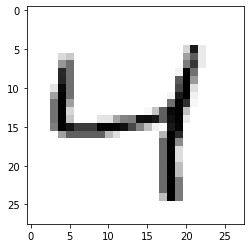

In [4]:

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

i_image = 2 
print(y_train[i_image]) 
plt.imshow(x_train[i_image], cmap='Greys')



# **Centroid and grid function**

In [33]:
def CenetroizdAndGrid(image , grid):
    row, col = image.shape
    image_grids=[[0 for i in range(grid)] for j in range(grid)]

    row2, col2 = math.ceil(row/grid), math.ceil(col/grid)

    rnew , cnew=0 ,0
   
    
    rc=0
    for i in range(grid-1):
        cnew=0
        rc=rc+row2
        
        for j in range(grid-1):
            image_grids[i][j]=[[0 for ee in range(row2)] for rr in range(col2)]
            image_grids[i][j]=image[rnew:row2+rnew , cnew:col2+cnew ]
            cnew=cnew+col2
        rnew=rnew+row2

    if (28-rc==0):
       rc=row2
    else:
      rc=28-rc
    
    rnew=0
    for i in range(grid-1):
         image_grids[i][grid-1]=[[0 for ee in range(row2)] for rr in range(rc)]
         image_grids[i][grid-1]=image[rnew:row2+rnew , cnew:   ]
         rnew=rnew+row2
         
    cnew=0
    for j in range(grid-1):
         image_grids[grid-1][j]=[[0 for ee in range(rc)] for rr in range(col2)]
         image_grids[grid-1][j]=image[rnew:  , cnew:col2+cnew ]
         cnew=cnew+col2


    image_grids[grid-1][grid-1]=[[0 for ee in range(rc)] for rr in range(rc)]

    image_grids[grid-1][grid-1]=image[rnew:  , cnew: ]




    feature_vector=np.zeros((1,(2*grid*grid)))
    count=0
    SumX , SumY , sum_image_box =0,0,0
 
    
    for a in range(grid):
        for b in range(grid):
          image_box=image_grids[a][b]
         
          for i in range(image_box.shape[0]):
              for j in range(image_box.shape[1]):
                 SumX=SumX+image_box[i][j]*i
                 SumY=SumY+image_box[i][j]*j
                 sum_image_box=sum_image_box+image_box[i][j]
              
          if sum_image_box!=0 :
             Xc =SumX / sum_image_box
             Yc = SumY / sum_image_box
            
             feature_vector[0][count]=Xc
             feature_vector[0][count+1]=Yc
             count=count+2
          else :
               Xc =0
               Yc = 0
               feature_vector[0][count]=Xc
               feature_vector[0][count+1]=Yc
               count=count+2
  
    return feature_vector

# [**calling function and new x train**]

In [34]:
grid=3
c=0
new_Xtrain=np.zeros([ len(x_train),2*grid*grid])
for i in range(len(x_train)):
      image=np.array(x_train[i])
      new_Xtrain[i]=CenetroizdAndGrid(image,grid)    
print(new_Xtrain)
print(new_Xtrain.shape)




[[7.67267267 8.47372372 7.18904261 ... 4.64719346 4.96911898 4.64719346]
 [0.         0.         6.91843524 ... 4.57417591 4.41550088 4.57417591]
 [7.84166667 4.475      7.99362606 ... 5.31039449 4.40909325 5.31039449]
 ...
 [9.         9.         7.55857741 ... 4.34773179 4.42034159 4.34773179]
 [0.         0.         5.94505495 ... 4.82636577 4.40909536 4.82636577]
 [0.         0.         7.79762206 ... 3.97313576 4.61343212 3.97313576]]
(60000, 18)


# **new X test**

In [35]:
new_Xtest=np.zeros([ len(x_test),2*grid*grid])
for i in range(len(x_test)):
    array=np.array(x_test[i])
    new_Xtest[i]=CenetroizdAndGrid(array,grid)   
print(new_Xtest)
print(new_Xtest.shape)

[[7.89015544 7.59585492 8.31782347 ... 4.66598028 5.51029587 4.66598028]
 [5.92844778 8.44662435 5.57205975 ... 4.29805507 3.61414211 4.1169844 ]
 [0.         0.         6.53597413 ... 4.14365313 4.32762638 4.14365313]
 ...
 [9.         9.         7.8427762  ... 4.05309432 4.37231022 4.05309432]
 [0.         0.         8.93526635 ... 4.07846681 3.73334839 4.07846681]
 [6.25423729 9.         5.83957331 ... 4.50016756 4.9085411  4.49415533]]
(10000, 18)


# **KNN classifire**

In [36]:
KNN=OneVsRestClassifier(KNeighborsClassifier())
KNN.fit(new_Xtrain,y_train)


OneVsRestClassifier(estimator=KNeighborsClassifier(algorithm='auto',
                                                   leaf_size=30,
                                                   metric='minkowski',
                                                   metric_params=None,
                                                   n_jobs=None, n_neighbors=5,
                                                   p=2, weights='uniform'),
                    n_jobs=None)

# **predict and print accuracy**

In [37]:

Y_predicted=KNN.predict(new_Xtest)
sc=accuracy_score(y_test, Y_predicted)

print('%' , sc*100)

% 85.18


In [40]:

#when grid=3 score=0.8518
#when grid=4 score=0.8528
#when grid=5 score=0.8195
#when grid=6 score=0.7755